In [2]:
import pandas as pd
from datetime import datetime
from collections import Counter
import numpy as np

import requests
from bs4 import BeautifulSoup
import re
from matplotlib import pyplot as plt
            
data = pd.read_csv('/Users/tuan/Desktop/vinuni-stuff/VinUni-PhD-Courses/comp5120-datavis/projects/project02/arxiv05_v2.csv')

req = requests.get("https://arxiv.org/")
soup = BeautifulSoup(req.text, 'html.parser')
# Find all <a> tags with href containing "/recent"
recent_links = soup.find_all('a', href=lambda href: href and '/recent' in href)
topics = {}
# Print the links
for link in recent_links:
    # print(link['href'])
    topics[f"https://arxiv.org{link['href']}"] = link.text
    # if link.text == 'recent':
        # print(link)
print(len(topics))

# topics.keys()
topics_name = {}
for k, v in topics.items():
    if v != 'recent':
        topics_name[k.split('/')[-2]] = v
    # else:
    #     print(k, v)
# sorted topics_name by(key, value) in ascending order
topics_name = dict(sorted(topics_name.items(), key=lambda item: (item[0], item[1]) ))
print(topics_name)

166
{'astro-ph.CO': 'Cosmology and Nongalactic Astrophysics', 'astro-ph.EP': 'Earth and Planetary Astrophysics', 'astro-ph.GA': 'Astrophysics of Galaxies', 'astro-ph.HE': 'High Energy Astrophysical Phenomena', 'astro-ph.IM': 'Instrumentation and Methods for Astrophysics', 'astro-ph.SR': 'Solar and Stellar Astrophysics', 'cond-mat.dis-nn': 'Disordered Systems and Neural Networks', 'cond-mat.mes-hall': 'Mesoscale and Nanoscale Physics', 'cond-mat.mtrl-sci': 'Materials Science', 'cond-mat.other': 'Other Condensed Matter', 'cond-mat.quant-gas': 'Quantum Gases', 'cond-mat.soft': 'Soft Condensed Matter', 'cond-mat.stat-mech': 'Statistical Mechanics', 'cond-mat.str-el': 'Strongly Correlated Electrons', 'cond-mat.supr-con': 'Superconductivity', 'cs.AI': 'Artificial Intelligence', 'cs.AR': 'Hardware Architecture', 'cs.CC': 'Computational Complexity', 'cs.CE': 'Computational Engineering, Finance, and Science', 'cs.CG': 'Computational Geometry', 'cs.CL': 'Computation and Language', 'cs.CR': 'Cryp

In [2]:
data

,authors,authors_count,id,summary,tags,tags_count,time,date,title,weight,month,subject
0,"Piotr Padlewski, Max Bain, Matthew Henderson, ...",22,2405.02287,We introduce Vibe-Eval: a new open benchmark a...,"cs.AI, cs.CL, cs.CV",3,2024-05-03,3/5/2024,Vibe-Eval: A hard evaluation suite for measuri...,2.823417,2024-05,cs
1,"Wen-Hsuan Chu, Lei Ke, Katerina Fragkiadaki",3,2405.02280,Existing VLMs can track in-the-wild 2D video o...,cs.CV,1,2024-05-03,3/5/2024,DreamScene4D: Dynamic Multi-Object Scene Gener...,2.826437,2024-05,cs
2,"Hugh Zhang, Jeff Da, Dean Lee, Vaughn Robinson...",14,2405.00332,Large language models (LLMs) have achieved imp...,"cs.AI, cs.CL, cs.LG",3,2024-05-03,3/5/2024,A Careful Examination of Large Language Model ...,2.827919,2024-05,cs
3,"Longhui Yu, Weisen Jiang, Han Shi, Jincheng Yu...",10,2309.12284,Large language models (LLMs) have pushed the l...,"cs.AI, cs.CL",2,2024-05-03,3/5/2024,MetaMath: Bootstrap Your Own Mathematical Ques...,2.839944,2024-05,cs
4,"Siddhant Kharbanda, Atmadeep Banerjee, Devaans...",5,2109.07319,Automatic annotation of short-text data to a l...,"cs.AI, cs.CL, cs.LG",3,2024-05-03,3/5/2024,InceptionXML: A Lightweight Framework with Syn...,2.840697,2024-05,cs
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,"Junqing Huang, Haihui Wang, Andreas Weiermann,...",4,2311.01984,"In this paper, we derive a novel optimal image...",cs.CV,1,2023-11-03,3/11/2023,Optimal Image Transport on Sparse Dictionaries,184.996689,2023-11,cs
49996,"Haotian Luo, Kunming Wu, Cheng Dai, Sixian Din...",5,2311.01981,RNN-like language models are getting renewed a...,cs.CL,1,2023-11-03,3/11/2023,ProSG: Using Prompt Synthetic Gradients to All...,184.998761,2023-11,cs
49997,"Cyrille Kone, Emilie Kaufmann, Laura Richert",3,2307.00424,In this paper we revisit the fixed-confidence ...,"cs.LG, stat.ML",2,2023-11-03,3/11/2023,Adaptive Algorithms for Relaxed Pareto Set Ide...,185.002592,2023-11,"cs, stat"
49998,"Julian Moosmann, Pietro Bonazzi, Yawei Li, Siz...",7,2311.01057,Smart glasses are rapidly gaining advanced fun...,"cs.AI, cs.CV, cs.RO",3,2023-11-03,3/11/2023,Ultra-Efficient On-Device Object Detection on ...,185.004397,2023-11,cs


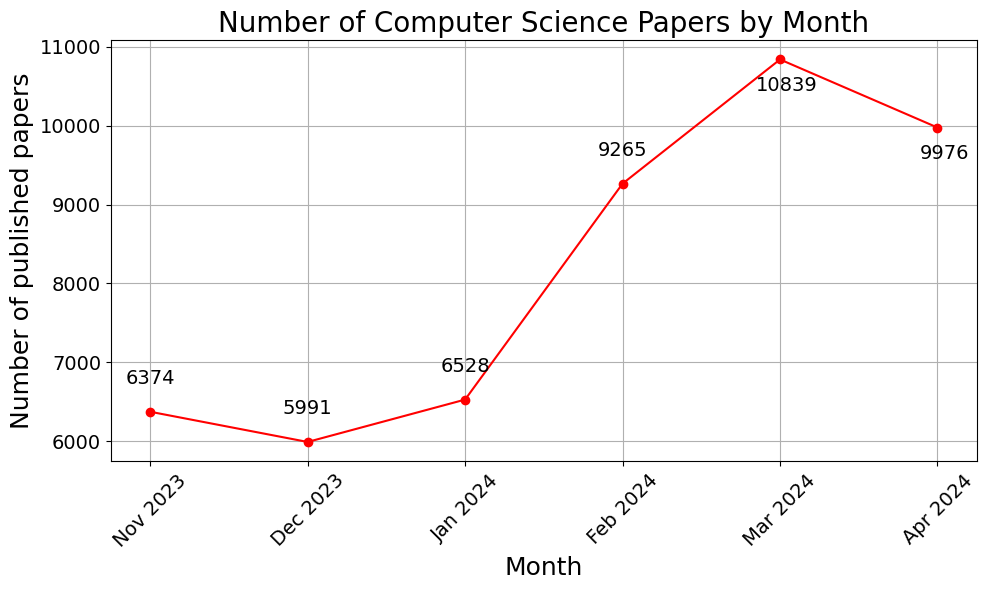

In [24]:
df = data.copy()
df['month'] = df['time'].str[:7]
grouped_df = df.groupby('month').size().reset_index(name='count')
sorted_df = grouped_df.sort_values('month').reset_index(drop=True)
# sorted_df
# remove '2024-05' 
sorted_df = sorted_df[:-1]


# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(sorted_df.index, sorted_df['count'], marker='o', color='r')
# adding value on top of each bar
for i, txt in enumerate(sorted_df['count']):
    # plt.annotate(txt, (sorted_df.index[i], sorted_df['count'][i]), textcoords="offset points", xytext=(0,-20), ha='center')
    if i <= 3:
        plt.annotate(txt, (sorted_df.index[i], sorted_df['count'][i]), textcoords="offset points", xytext=(0,20), ha='center', fontsize=14)
    else:
        plt.annotate(txt, (sorted_df.index[i], sorted_df['count'][i]), textcoords="offset points", xytext=(5, -23), ha='center', fontsize=14)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Number of published papers', fontsize=18)
plt.title('Number of Computer Science Papers by Month', fontsize=20)
# change the format of x-axis to display month; i.e 2024-01 to Jan 2024
plt.xticks(sorted_df.index, [datetime.strptime(date, '%Y-%m').strftime('%b %Y') for date in sorted_df['month']], rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
# plt.savefig('./pdf/number_of_papers_by_month-2311-2404.pdf')
plt.savefig('./images/number_of_papers_by_month-2311-2404.png')
plt.show()

In [26]:
subject_abv = {}
for idx, (k, v) in enumerate(topics_name.items()):
    # print(idx, k, v)
    sabv = k.split('.')[0]
    if sabv not in subject_abv:
        subject_abv[sabv] = []
    subject_abv[sabv].append(v)
for k, v in subject_abv.items():
    print(k, len(v), v)

subject_names = {
    'Physics': ['astro-ph', 'cond-mat', 'gr-qc', 'hep-ex', 'hep-lat', 'hep-ph', 'hep-th', 'math-ph', 'nlin', 'nucl-ex', 'nucl-th', 'physics', 'quant-ph'],
    'Computer Science': ['cs'],
    'Mathematics': ['math'],
    'Statistics': ['stat'],
    'Quantitative Biology': ['q-bio'],
    'Quantitative Finance': ['q-fin'],
    'Electrical Engineering and Systems Science': ['eess'],
    'Economics': ['econ'],
}
# mapping from each element in value in subject_name to key
subject_name = {}
for k, v in subject_names.items():
    for i in v:
        subject_name[i] = k
print(subject_name)

data_by_subject = {k: 0 for k in subject_names.keys()}

for idx, row in df.iterrows():
    tags = row['tags'].split(', ')
    # print(tags)
    dict_pp = {}
    for tag in tags:
        tag2 = tag.split('.')[0]
        tag3 = subject_name[tag2]
        dict_pp[tag3] = 1
    for k, v in dict_pp.items():
        data_by_subject[k] += 1
print(data_by_subject)

astro-ph 6 ['Cosmology and Nongalactic Astrophysics', 'Earth and Planetary Astrophysics', 'Astrophysics of Galaxies', 'High Energy Astrophysical Phenomena', 'Instrumentation and Methods for Astrophysics', 'Solar and Stellar Astrophysics']
cond-mat 9 ['Disordered Systems and Neural Networks', 'Mesoscale and Nanoscale Physics', 'Materials Science', 'Other Condensed Matter', 'Quantum Gases', 'Soft Condensed Matter', 'Statistical Mechanics', 'Strongly Correlated Electrons', 'Superconductivity']
cs 40 ['Artificial Intelligence', 'Hardware Architecture', 'Computational Complexity', 'Computational Engineering, Finance, and Science', 'Computational Geometry', 'Computation and Language', 'Cryptography and Security', 'Computer Vision and Pattern Recognition', 'Computers and Society', 'Databases', 'Distributed, Parallel, and Cluster Computing', 'Digital Libraries', 'Discrete Mathematics', 'Data Structures and Algorithms', 'Emerging Technologies', 'Formal Languages and Automata Theory', 'General L

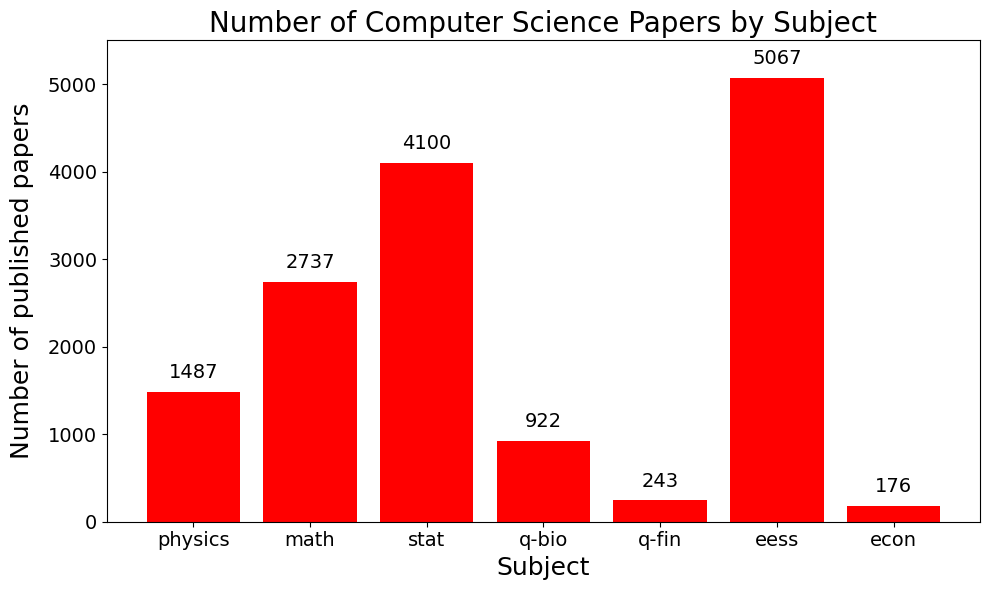

In [28]:
# plot this data {'Physics': 1487, 'Computer Science': 50000, 'Mathematics': 2737, 'Statistics': 4100, 'Quantitative Biology': 922, 'Quantitative Finance': 243, 'Electrical Engineering and Systems Science': 5067, 'Economics': 176}
# with key is x-axis, value is y-axis
# data_by_subject['Electrical Engineering'] = data_by_subject.pop('Electrical Engineering and Systems Science')
mapping_x_title = {
    'Physics': 'physics',
    # 'Computer Science': 'cs',
    'Mathematics': 'math',
    'Statistics': 'stat',
    'Quantitative Biology': 'q-bio',
    'Quantitative Finance': 'q-fin',
    'Electrical Engineering and Systems Science': 'eess',
    'Economics': 'econ',
}
# remove 'cs' in data_by_subject
data_by_subject.pop('Computer Science')
new_labels = [mapping_x_title[k] for k in data_by_subject.keys()]
# show the number of papers in each subject in the bar chart
plt.figure(figsize=(10, 6))
plt.bar(new_labels, data_by_subject.values(), color='r')
# adding value on top of each bar
for i, txt in enumerate(list(data_by_subject.values())):
    plt.annotate(txt, (new_labels[i], list(data_by_subject.values())[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=14)
# adding text to explain (value, key) in mapping_x_title
# plt.xticks(new_labels, [f"{v} ({k})" for k, v in mapping_x_title.items()], rotation=45, fontsize=14)
# plt.legend(['Number of papers'], fontsize=14)


plt.xlabel('Subject', fontsize=18)
plt.ylabel('Number of published papers', fontsize=18, labelpad=10)
# extend the y-axis to 55000
plt.ylim(0, 5500)
plt.title('Number of Computer Science Papers by Subject', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
# plt.savefig('./pdf/number_of_papers_by_subject-2311-2404.pdf')
plt.savefig('./images/number_of_papers_by_subject-2311-2404.png')
plt.show()


In [29]:
# print value, key in mapping_x_title.items()
for k, v in mapping_x_title.items():
    print(f'{v}: {k}')

physics: Physics
math: Mathematics
stat: Statistics
q-bio: Quantitative Biology
q-fin: Quantitative Finance
eess: Electrical Engineering and Systems Science
econ: Economics


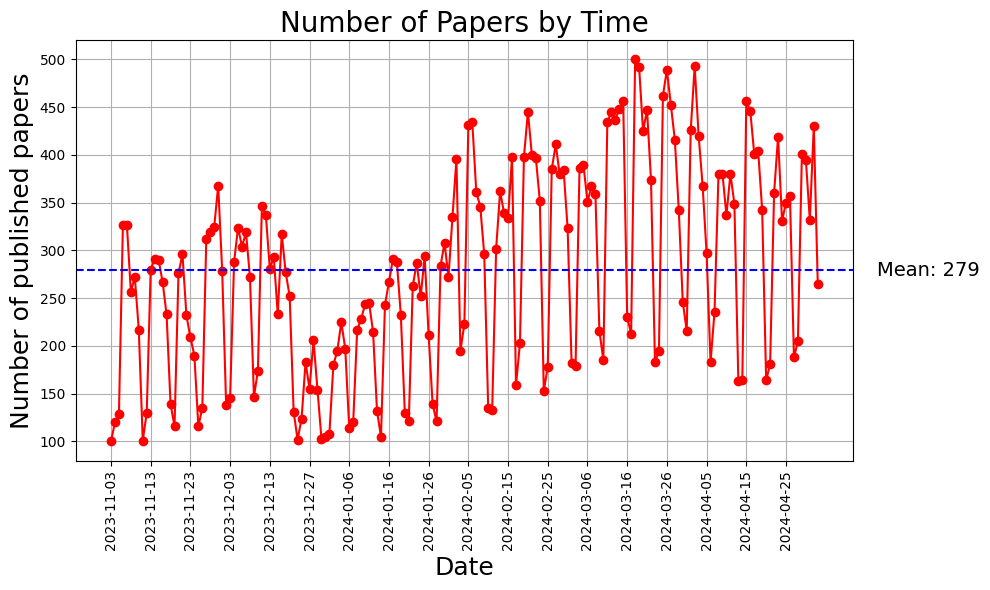

In [30]:
# Group by 'time' and count the number of collections for each time
df = pd.DataFrame(data)
grouped_df = df.groupby('time').size().reset_index(name='count')

# Sort by 'time'
sorted_df = grouped_df.sort_values('time').reset_index(drop=True)



# Plot using Matplotlib
plt.figure(figsize=(10, 6))

plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of published papers', fontsize=18)
plt.title('Number of Papers by Time', fontsize=20)
# only show every 10th label
plt.xticks(sorted_df.index[::10], sorted_df['time'][::10], rotation=90)
plt.plot(sorted_df.index, sorted_df['count'], marker='o', color='r')
# show the mean line of the number of papers
mean = sorted_df['count'].mean()
plt.axhline(y=mean, color='b', linestyle='--', label=f'Mean: {mean:.2f}')
# plot the text showing the mean value in the right of the mean line, outside the plot
plt.text(sorted_df.index[-1] + 15, mean, f'Mean: {int(mean)}', ha='left', va='center', backgroundcolor='w', fontsize=14)

# plt.plot(sorted_df.index, sorted_df['count'], marker='o', color='r')
# plot the line chart with the number of papers, if the number of papers is less than mean, the color is red, otherwise, the color is blue
# plt.plot(sorted_df.index, sorted_df['count'], marker='o', color=np.where(sorted_df['count'] < mean, 'r', 'b'))
plt.grid(True)
plt.tight_layout()
# plt.savefig('./pdf/number_of_papers_by_day.pdf')
plt.savefig('./images/number_of_papers_by_day.png')
plt.show()

In [31]:
sub_list = list(subject_names.keys())
# remove 'Computer Science' from the list and sort the list
sub_list.remove('Computer Science')
sub_list = sorted(sub_list)
print(sub_list)
heatmap_data = np.zeros((len(sub_list), len(sub_list)))

for idx, row in df.iterrows():
    tags = row['tags'].split(', ')
    dict_pp = {}
    for tag in tags:
        tag2 = tag.split('.')[0]
        tag3 = subject_name[tag2]
        dict_pp[tag3] = 1
    for k, v in dict_pp.items():
        for k2, v2 in dict_pp.items():
            if k == k2:
                continue
            if k in sub_list and k2 in sub_list:
                heatmap_data[sub_list.index(k), sub_list.index(k2)] += 1

# sub_list[sub_list.index('Electrical Engineering and Systems Science')] = 'Electrical Engineering'
# change the sub_list to the short name using mapping_x_title
sub_list = [mapping_x_title[k] for k in sub_list]
print(heatmap_data)

['Economics', 'Electrical Engineering and Systems Science', 'Mathematics', 'Physics', 'Quantitative Biology', 'Quantitative Finance', 'Statistics']
[[   0.    2.   18.    5.    0.   60.   71.]
 [   2.    0.  335.  160.  132.    3.  181.]
 [  18.  335.    0.  125.   28.   11. 1001.]
 [   5.  160.  125.    0.   77.    5.  160.]
 [   0.  132.   28.   77.    0.    0.   90.]
 [  60.    3.   11.    5.    0.    0.   36.]
 [  71.  181. 1001.  160.   90.   36.    0.]]


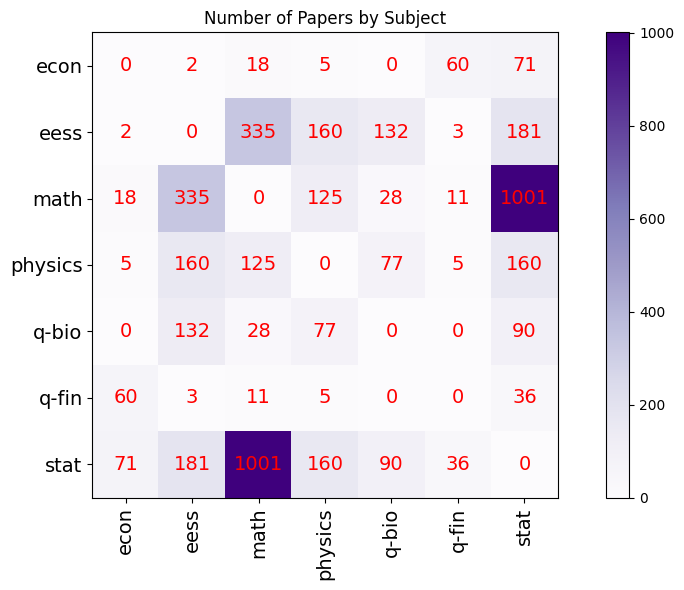

In [32]:
# plot heatmap
# replace 'Electrical Engineering and Systems Science' by 'Electrical Engineering' in sub_list
plt.figure(figsize=(10, 6))
plt.imshow(heatmap_data, cmap='Purples', interpolation='nearest')
# plt.imshow(heatmap_data, cmap='Greens', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(sub_list)), sub_list, rotation=90, fontsize=14)
plt.yticks(range(len(sub_list)), sub_list, fontsize=14)
# adding value into each cell of heatmap with integer format
for i in range(len(sub_list)):
    for j in range(len(sub_list)):
        plt.text(j, i, int(heatmap_data[i, j]), ha='center', va='center', color='red', fontsize=14)
plt.title('Number of Papers by Subject')
plt.tight_layout()
# plt.savefig('./pdf/number_of_papers_by_subject_heatmap.pdf')
plt.savefig('./images/number_of_papers_by_subject_heatmap.png')
plt.show()

In [4]:
df = pd.DataFrame(data)

In [6]:

data_tag_distinct = df['subject'].value_counts()
# print(data_tag_distinct)
# sort data_tag_distinct by key
data_tag_by_key = dict(sorted(data_tag_distinct.items(), key=lambda item: (item[0], item[1]) ))
for k, v in data_tag_by_key.items():
    print(k, v)
print(len(data_tag_by_key))

cs 37605
cs, econ 49
cs, econ, eess, q-fin 2
cs, econ, math 2
cs, econ, math, stat 16
cs, econ, physics 2
cs, econ, physics, q-fin 3
cs, econ, q-fin 47
cs, econ, q-fin, stat 8
cs, econ, stat 47
cs, eess 4334
cs, eess, math 270
cs, eess, math, physics 3
cs, eess, math, q-bio 2
cs, eess, math, stat 60
cs, eess, physics 145
cs, eess, physics, q-bio 6
cs, eess, physics, stat 6
cs, eess, q-bio 123
cs, eess, q-bio, stat 1
cs, eess, q-fin 1
cs, eess, stat 114
cs, math 1347
cs, math, physics 86
cs, math, physics, q-bio 3
cs, math, physics, stat 33
cs, math, q-bio 17
cs, math, q-bio, stat 6
cs, math, q-fin 6
cs, math, q-fin, stat 5
cs, math, stat 881
cs, physics 1018
cs, physics, q-bio 59
cs, physics, q-bio, stat 9
cs, physics, q-fin 2
cs, physics, stat 112
cs, q-bio 622
cs, q-bio, stat 74
cs, q-fin 146
cs, q-fin, stat 23
cs, stat 2705
41


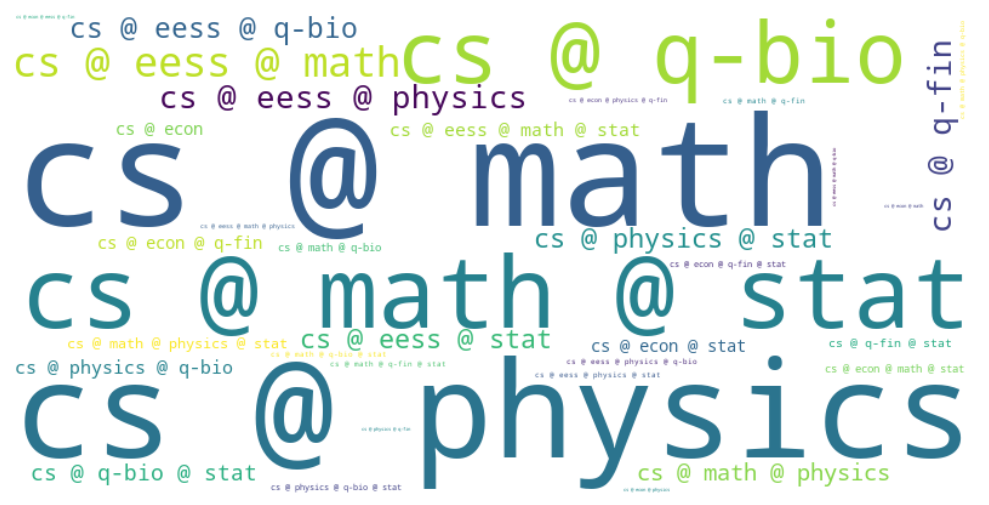

In [33]:
# word cloud for data_tag_by_key (k: name, v: number of papers)
# replace , in key by - 
# remove all value >= 1500
data_tag_by_key_2 = {k.replace(',', ' @') : v for k, v in data_tag_by_key.items() if v < 1500}
# data_tag_by_key_2 = {k.replace(',', ' -') : v for k, v in data_tag_by_key.items()}
from wordcloud import WordCloud
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data_tag_by_key_2)
# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
# plt.savefig('./pdf/word_cloud.pdf')
plt.savefig('./images/word_cloud_multi_subjects.png')
plt.show()


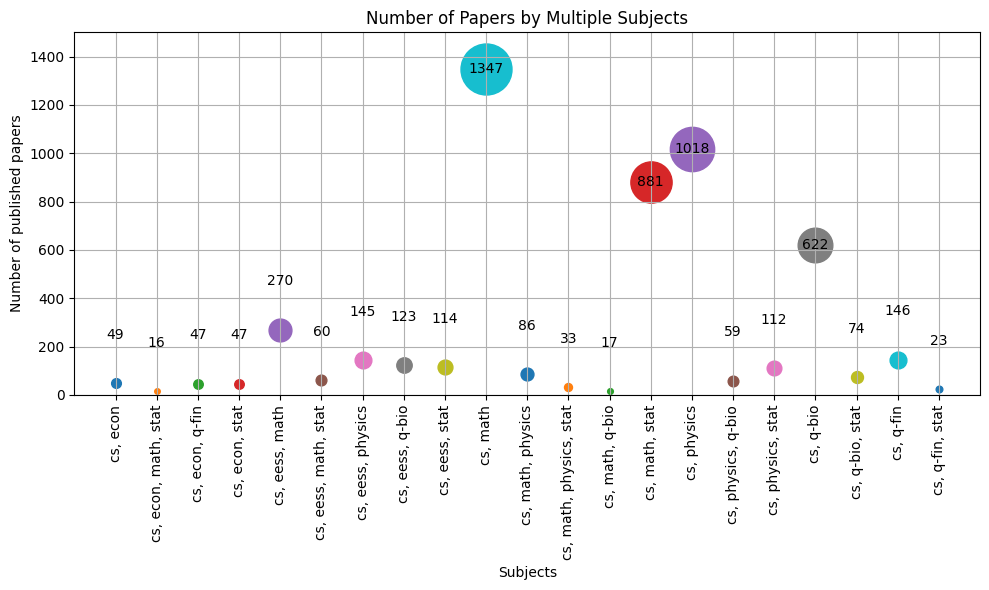

In [16]:
data_filter = {k: v for k, v in data_tag_by_key.items() if k != 'cs' and v >= 10  and v < 1500}
# data_filter = data_filter.pop('cs')
# shot bubble chart
plt.figure(figsize=(10, 6))
for idx, (k, v) in enumerate(data_filter.items()):   
    plt.scatter(idx, v, s=v, label=k)
    # adding value on top of each bubble
    if v > 500:
        plt.text(idx, v, v, ha='center', va='center')
    else:
        # put the value on top of the bubble + 10
        plt.text(idx, v+200, v, ha='center', va='center')

plt.xlabel('Subjects')
plt.ylabel('Number of published papers')
plt.title('Number of Papers by Multiple Subjects')
plt.xticks(range(len(data_filter)), data_filter.keys(), rotation=90)
# extend the y axis to 5000
plt.ylim(0, 1500)
# set legend outside of the plot
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.savefig('./pdf/number_of_papers_by_subject_bubble_2406.pdf')
plt.savefig('./images/number_of_papers_by_subject_bubble_2406.pdf')
plt.show()

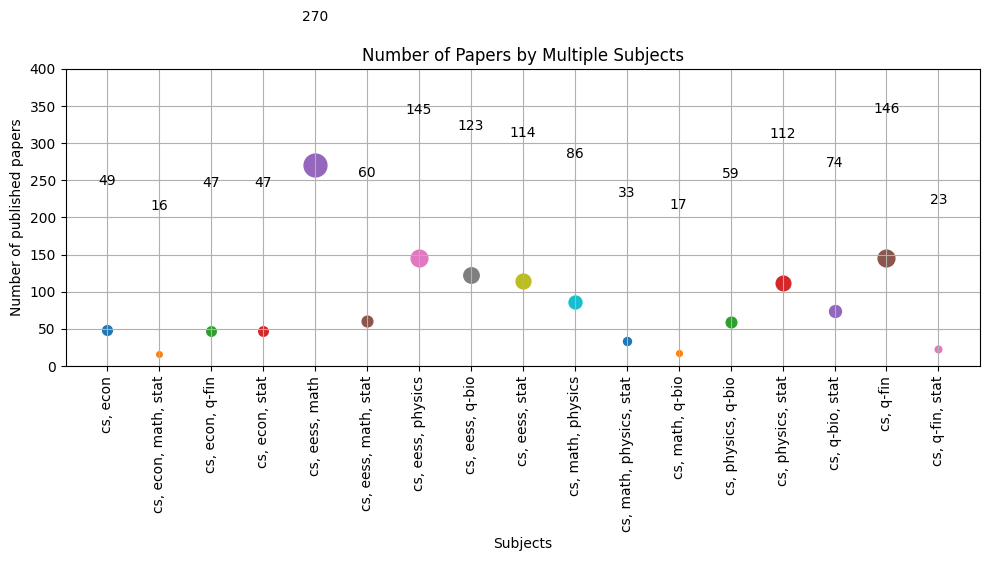

In [15]:
data_filter = {k: v for k, v in data_tag_by_key.items() if k != 'cs' and v >= 10 and v < 600}
# data_filter = data_filter.pop('cs')
# shot bubble chart
plt.figure(figsize=(10, 6))
for idx, (k, v) in enumerate(data_filter.items()):   
    plt.scatter(idx, v, s=v, label=k)
    # adding value on top of each bubble
    if v > 500:
        plt.text(idx, v, v, ha='center', va='center')
    else:
        # put the value on top of the bubble + 10
        plt.text(idx, v+200, v, ha='center', va='center')

plt.xlabel('Subjects')
plt.ylabel('Number of published papers')
plt.title('Number of Papers by Multiple Subjects')
plt.xticks(range(len(data_filter)), data_filter.keys(), rotation=90)
# extend the y axis to 5000
plt.ylim(0, 400)
# set legend outside of the plot
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.savefig('./pdf/number_of_papers_by_subject_bubble_2406_v10.pdf')
plt.show()